# 100 pandas puzzles

Inspired by [100 Numpy exerises](https://github.com/rougier/numpy-100), here are 100* short puzzles for testing your knowledge of [pandas'](http://pandas.pydata.org/) power.

Since pandas is a large library with many different specialist features and functions, these excercises focus mainly on the fundamentals of manipulating data (indexing, grouping, aggregating, cleaning), making use of the core DataFrame and Series objects. 

Many of the excerises here are stright-forward in that the solutions require no more than a few lines of code (in pandas or NumPy... don't go using pure Python or Cython!). Choosing the right methods and following best practices is the underlying goal.

The exercises are loosely divided in sections. Each section has a difficulty rating; these ratings are subjective, of course, but should be a seen as a rough guide as to how inventive the required solution is.

If you're just starting out with pandas and you are looking for some other resources, the official documentation  is very extensive. In particular, some good places get a broader overview of pandas are...

- [10 minutes to pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html)
- [pandas basics](http://pandas.pydata.org/pandas-docs/stable/basics.html)
- [tutorials](http://pandas.pydata.org/pandas-docs/stable/tutorials.html)
- [cookbook and idioms](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook)

Enjoy the puzzles!

\* *the list of exercises is not yet complete! Pull requests or suggestions for additional exercises, corrections and improvements are welcomed.*

## Importing pandas

### Getting started and checking your pandas setup

Difficulty: *easy* 

**1.** Import pandas under the name `pd`.

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np

**2.** Print the version of pandas that has been imported.

**3.** Print out all the version information of the libraries that are required by the pandas library.

## DataFrame basics

### A few of the fundamental routines for selecting, sorting, adding and aggregating data in DataFrames

Difficulty: *easy*

Note: remember to import numpy using:
```python
import numpy as np
```

Consider the following Python dictionary `data` and Python list `labels`:

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```
(This is just some meaningless data I made up with the theme of animals and trips to a vet.)

**4.** Create a DataFrame `df` from this dictionary `data` which has the index `labels`.

In [3]:
import numpy as np
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

In [4]:
df = pd.DataFrame.from_dict(data) # or just pd.DataFrame(data)
df.index = labels
df

animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no
d    dog  NaN       3      yes
e    dog  5.0       2       no
f    cat  2.0       3       no
g  snake  4.5       1       no
h    cat  NaN       1      yes
i    dog  7.0       2       no
j    dog  3.0       1       no

In [5]:
df.dtypes

animal       object
age         float64
visits        int64
priority     object
dtype: object

In [6]:
data = [['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        [2.5, 3, 0.5, np.NaN, 5, 2, 4.5, np.NaN, 7, 3],
        [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']]
cols = ['animal','age','visits','priority']

In [7]:
np.transpose(np.array(data)) # not good

array([['cat', '2.5', '1', 'yes'],
       ['cat', '3', '3', 'yes'],
       ['snake', '0.5', '2', 'no'],
       ['dog', 'nan', '3', 'yes'],
       ['dog', '5', '2', 'no'],
       ['cat', '2', '3', 'no'],
       ['snake', '4.5', '1', 'no'],
       ['cat', 'nan', '1', 'yes'],
       ['dog', '7', '2', 'no'],
       ['dog', '3', '1', 'no']], dtype='<U5')

In [8]:
data_dic = {c:d for c,d in zip(cols,data)}


In [9]:
df = pd.DataFrame(data_dic)
df.index = labels
df

animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no
d    dog  NaN       3      yes
e    dog  5.0       2       no
f    cat  2.0       3       no
g  snake  4.5       1       no
h    cat  NaN       1      yes
i    dog  7.0       2       no
j    dog  3.0       1       no

In [10]:
df.dtypes

animal       object
age         float64
visits        int64
priority     object
dtype: object

**5.** Display a summary of the basic information about this DataFrame and its data.

In [11]:
df.describe()

age     visits
count  8.000000  10.000000
mean   3.437500   1.900000
std    2.007797   0.875595
min    0.500000   1.000000
25%    2.375000   1.000000
50%    3.000000   2.000000
75%    4.625000   2.750000
max    7.000000   3.000000

**6.** Return the first 3 rows of the DataFrame `df`.

In [12]:
df.head(3)

animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no

**7.** Select just the 'animal' and 'age' columns from the DataFrame `df`.

In [13]:
df.loc[:,['animal','age']]
df[['animal','age']]

animal  age
a    cat  2.5
b    cat  3.0
c  snake  0.5
d    dog  NaN
e    dog  5.0
f    cat  2.0
g  snake  4.5
h    cat  NaN
i    dog  7.0
j    dog  3.0

animal  age
a    cat  2.5
b    cat  3.0
c  snake  0.5
d    dog  NaN
e    dog  5.0
f    cat  2.0
g  snake  4.5
h    cat  NaN
i    dog  7.0
j    dog  3.0

**8.** Select the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']`.

In [14]:
df.iloc[[3,4,8],[0,1]]
df.iloc[[3,4,8]].loc[:,['animal', 'age']]
df.loc[df.index[[3,4,8]],['animal', 'age']]
# can't do df.loc[[3,4,8],['animal',...]] b/c index aint number

animal  age
d    dog  NaN
e    dog  5.0
i    dog  7.0

animal  age
d    dog  NaN
e    dog  5.0
i    dog  7.0

animal  age
d    dog  NaN
e    dog  5.0
i    dog  7.0

**9.** Select only the rows where the number of visits is greater than 3.

In [15]:
df.loc[df.visits > 2]
df.loc[df.visits > 2]

animal  age  visits priority
b    cat  3.0       3      yes
d    dog  NaN       3      yes
f    cat  2.0       3       no

animal  age  visits priority
b    cat  3.0       3      yes
d    dog  NaN       3      yes
f    cat  2.0       3       no

**10.** Select the rows where the age is missing, i.e. is `NaN`.

In [16]:
df[df.age.isnull()]

animal  age  visits priority
d    dog  NaN       3      yes
h    cat  NaN       1      yes

**11.** Select the rows where the animal is a cat *and* the age is less than 3.

In [17]:
df[(df.animal == 'cat') & (df.age < 3)]

animal  age  visits priority
a    cat  2.5       1      yes
f    cat  2.0       3       no

**12.** Select the rows the age is between 2 and 4 (inclusive).

In [18]:
df[(df.age >=2) & (df.age <=4)]
df[df.age.between(2,4)]

animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
f    cat  2.0       3       no
j    dog  3.0       1       no

animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
f    cat  2.0       3       no
j    dog  3.0       1       no

**13.** Change the age in row 'f' to 1.5.

In [19]:
df.loc['f','age'] = 1.5
df

animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no
d    dog  NaN       3      yes
e    dog  5.0       2       no
f    cat  1.5       3       no
g  snake  4.5       1       no
h    cat  NaN       1      yes
i    dog  7.0       2       no
j    dog  3.0       1       no

**14.** Calculate the sum of all visits (the total number of visits).

In [20]:
df.visits.sum()

19

**15.** Calculate the mean age for each different animal in `df`.

In [21]:
df.groupby(['animal']).age.mean()

animal
cat      2.333333
dog      5.000000
snake    2.500000
Name: age, dtype: float64

**16.** Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.

In [22]:
df.tail(2)
df.loc['k'] = ['hamster',1,1,'yes']
df.tail(2)

animal  age  visits priority
i    dog  7.0       2       no
j    dog  3.0       1       no

animal  age  visits priority
j      dog  3.0       1       no
k  hamster  1.0       1      yes

In [ ]:
df.drop(index='k',inplace=True)
# df.drop('k',axis=0,inplace=True)

In [25]:
df.tail(2)

animal  age  visits priority
i    dog  7.0       2       no
j    dog  3.0       1       no

**17.** Count the number of each type of animal in `df`.

In [131]:
df.animal.value_counts()

dog      4
cat      4
snake    2
Name: animal, dtype: int64

**18.** Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visit' column in *ascending* order.

In [28]:
df.sort_values(['age','visits'],ascending=[False,True])

animal  age  visits priority
i    dog  7.0       2       no
e    dog  5.0       2       no
g  snake  4.5       1       no
j    dog  3.0       1       no
b    cat  3.0       3      yes
a    cat  2.5       1      yes
f    cat  1.5       3       no
c  snake  0.5       2       no
h    cat  NaN       1      yes
d    dog  NaN       3      yes

**19.** The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.

In [29]:
df

animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no
d    dog  NaN       3      yes
e    dog  5.0       2       no
f    cat  1.5       3       no
g  snake  4.5       1       no
h    cat  NaN       1      yes
i    dog  7.0       2       no
j    dog  3.0       1       no

In [30]:
# df.priority = df.priority.apply(lambda p: True if p== 'yes' else False)
df.priority.apply(lambda p: True if p== 'yes' else False)

temp_dic = {'yes':True,'no':False}
df.priority.map(temp_dic)


a     True
b     True
c    False
d     True
e    False
f    False
g    False
h     True
i    False
j    False
Name: priority, dtype: bool

a     True
b     True
c    False
d     True
e    False
f    False
g    False
h     True
i    False
j    False
Name: priority, dtype: bool

In [31]:
df.priority = df.priority.apply(lambda p: True if p== 'yes' else False)
df

animal  age  visits  priority
a    cat  2.5       1      True
b    cat  3.0       3      True
c  snake  0.5       2     False
d    dog  NaN       3      True
e    dog  5.0       2     False
f    cat  1.5       3     False
g  snake  4.5       1     False
h    cat  NaN       1      True
i    dog  7.0       2     False
j    dog  3.0       1     False

**20.** In the 'animal' column, change the 'snake' entries to 'python'.

In [32]:
temp_dic = {'snake':'python'}

df['animal'].replace('snake', 'python')
df['animal'].replace(temp_dic) # like map
df.replace({'animal':temp_dic})

df.animal = df['animal'].replace(temp_dic)
df

a       cat
b       cat
c    python
d       dog
e       dog
f       cat
g    python
h       cat
i       dog
j       dog
Name: animal, dtype: object

a       cat
b       cat
c    python
d       dog
e       dog
f       cat
g    python
h       cat
i       dog
j       dog
Name: animal, dtype: object

animal  age  visits  priority
a     cat  2.5       1      True
b     cat  3.0       3      True
c  python  0.5       2     False
d     dog  NaN       3      True
e     dog  5.0       2     False
f     cat  1.5       3     False
g  python  4.5       1     False
h     cat  NaN       1      True
i     dog  7.0       2     False
j     dog  3.0       1     False

animal  age  visits  priority
a     cat  2.5       1      True
b     cat  3.0       3      True
c  python  0.5       2     False
d     dog  NaN       3      True
e     dog  5.0       2     False
f     cat  1.5       3     False
g  python  4.5       1     False
h     cat  NaN       1      True
i     dog  7.0       2     False
j     dog  3.0       1     False

**21.** For each animal type and each number of visits, find the mean age. In other words, each row is an animal, each column is a number of visits and the values are the mean ages (hint: use a pivot table).

In [33]:
df.pivot_table(index='animal',columns='visits',aggfunc = np.mean,values='age')
# default for aggfunc is mean

visits    1    2     3
animal                
cat     2.5  NaN  2.25
dog     3.0  6.0   NaN
python  4.5  0.5   NaN

## DataFrames: beyond the basics

### Slightly trickier: you may need to combine two or more methods to get the right answer

Difficulty: *medium*

The previous section was tour through some basic but essential DataFrame operations. Below are some ways that you might need to cut your data, but for which there is no single "out of the box" method.

**22.** You have a DataFrame `df` with a column 'A' of integers. For example:
```python
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
```

How do you filter out rows which contain the same integer as the row immediately above?

In [35]:
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
# answer would be 2 5 7

In [36]:
df.A.shift()

0     NaN
1     1.0
2     2.0
3     2.0
4     3.0
5     4.0
6     5.0
7     5.0
8     5.0
9     6.0
10    7.0
Name: A, dtype: float64

In [37]:
df[df.A.shift() == df.A]

A
2   2
6   5
7   5
10  7

**23.** Given a DataFrame of numeric values, say
```python
df = pd.DataFrame(np.random.random(size=(5, 3))) # a 5x3 frame of float values
```

how do you subtract the row mean from each element in the row?

In [38]:
df = pd.DataFrame(np.random.random(size=(5, 3)))
df

0         1         2
0  0.876166  0.225644  0.746490
1  0.167328  0.560258  0.335640
2  0.558955  0.523510  0.415694
3  0.303653  0.883584  0.931698
4  0.897679  0.328525  0.314195

In [42]:
df.mean(axis=1)

0    0.616100
1    0.354409
2    0.499386
3    0.706312
4    0.513467
dtype: float64

In [53]:
df.values - df.mean(axis=1).values.reshape(-1,1) # the bad way

array([[ 0.26006621, -0.3904557 ,  0.13038949],
       [-0.18708056,  0.20584911, -0.01876855],
       [ 0.05956839,  0.0241235 , -0.08369189],
       [-0.40265839,  0.17727213,  0.22538627],
       [ 0.38421241, -0.18494116, -0.19927125]])

In [54]:
df.subtract(df.mean(axis=1),axis=0) # the good way

0         1         2
0  0.260066 -0.390456  0.130389
1 -0.187081  0.205849 -0.018769
2  0.059568  0.024123 -0.083692
3 -0.402658  0.177272  0.225386
4  0.384212 -0.184941 -0.199271

**24.** Suppose you have DataFrame with 10 columns of real numbers, for example:

```python
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
```
Which column of numbers has the smallest sum? (Find that column's label.)

In [55]:
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
df

a         b         c         d         e         f         g  \
0  0.590472  0.666779  0.143030  0.562400  0.070651  0.151430  0.874218   
1  0.500472  0.305878  0.330544  0.414431  0.389995  0.661368  0.929719   
2  0.010106  0.956018  0.295658  0.036071  0.128317  0.021715  0.933161   
3  0.270128  0.887194  0.437838  0.046084  0.052386  0.824494  0.925554   
4  0.626032  0.173935  0.375108  0.418324  0.493987  0.616930  0.740191   

          h         i         j  
0  0.422901  0.004796  0.925092  
1  0.903908  0.237379  0.731852  
2  0.507744  0.304675  0.990356  
3  0.084281  0.514330  0.906243  
4  0.081518  0.325906  0.187307

In [59]:
df.columns[df.sum(axis=0).argmin()] # the long way

'e'

In [58]:
df.sum(axis=0).idxmin()

'e'

**25.** How do you count how many unique rows a DataFrame has (i.e. ignore all rows that are duplicates)?

In [61]:
data = [[1,1],[1,2],[1,1],[1,3],[2,1],[2,1]]
df = pd.DataFrame(data,columns = list('ab'))
df

a  b
0  1  1
1  1  2
2  1  1
3  1  3
4  2  1
5  2  1

In [188]:
len(df) - df.duplicated(keep=False).sum()

2

The next three puzzles are slightly harder...

**26.** You have a DataFrame that consists of 10 columns of floating--point numbers. Suppose that exactly 5 entries in each row are NaN values. For each row of the DataFrame, find the *column* which contains the *third* NaN value.

(You should return a Series of column labels.)

In [64]:
data = [[np.NaN,np.NaN,1,1],[1,np.NaN,2,np.NaN],[1,np.NaN,np.NaN,1],[1,np.NaN,3,np.NaN]]
df = pd.DataFrame(data,columns = list('abcd'))
df

a   b    c    d
0  NaN NaN  1.0  1.0
1  1.0 NaN  2.0  NaN
2  1.0 NaN  NaN  1.0
3  1.0 NaN  3.0  NaN

In [65]:
nth=2
def col_nth_nan(row):
    return row[row.isnull()==True].index[nth-1]
df.apply(col_nth_nan,axis=1)

0    b
1    d
2    c
3    d
dtype: object

In [69]:
(df.isnull().cumsum(axis=1))
(df.isnull().cumsum(axis=1) == nth)

a  b  c  d
0  1  2  2  2
1  0  1  1  2
2  0  1  2  2
3  0  1  1  2

a      b      c     d
0  False   True   True  True
1  False  False  False  True
2  False  False   True  True
3  False  False  False  True

In [71]:
(df.isnull().cumsum(axis=1) == nth).idxmax(axis=1) # for multiple max values, pandas pick the first one

0    b
1    d
2    c
3    d
dtype: object

In [252]:
# benchmarking
data=[[np.NaN,np.NaN,1,1]]*10**5
df = pd.DataFrame(data,columns = list('abcd'))
df.head()
df.shape

a   b  c  d
0 NaN NaN  1  1
1 NaN NaN  1  1
2 NaN NaN  1  1
3 NaN NaN  1  1
4 NaN NaN  1  1

(100000, 4)

In [249]:
%%time
nth=2
def col_nth_nan(row):
    return row[row.isnull()==True].index[nth-1]
_ = df.apply(col_nth_nan,axis=1)

CPU times: user 30.9 s, sys: 0 ns, total: 30.9 s
Wall time: 31 s


In [253]:
%%time
_=(df.isnull().cumsum(axis=1) == nth).idxmax(axis=1) # for multiple max values, pandas pick the first one

CPU times: user 70.2 ms, sys: 24 µs, total: 70.2 ms
Wall time: 69.6 ms


**27.** A DataFrame has a column of groups 'grps' and and column of numbers 'vals'. For example: 

```python
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
```
For each *group*, find the sum of the three greatest values.

In [72]:
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
df

grps  vals
0     a    12
1     a   345
2     a     3
3     b     1
4     b    45
5     c    14
6     a     4
7     a    52
8     b    54
9     c    23
10    c   235
11    c    21
12    b    57
13    b     3
14    c    87

In [73]:
df.vals.nlargest(3)

1     345
10    235
14     87
Name: vals, dtype: int64

In [75]:
temp=df.groupby(['grps']).vals

In [81]:
for i in temp:
    print(i)
    print(type(i[1]))

('a', 0     12
1    345
2      3
6      4
7     52
Name: vals, dtype: int64)
<class 'pandas.core.series.Series'>
('b', 3      1
4     45
8     54
12    57
13     3
Name: vals, dtype: int64)
<class 'pandas.core.series.Series'>
('c', 5      14
9      23
10    235
11     21
14     87
Name: vals, dtype: int64)
<class 'pandas.core.series.Series'>


In [93]:
temp2=temp.nlargest(3)
temp2

grps    
a     1     345
      7      52
      0      12
b     12     57
      8      54
      4      45
c     10    235
      14     87
      9      23
Name: vals, dtype: int64

In [40]:
temp2.index #multi index

MultiIndex(levels=[['a', 'b', 'c'], [0, 1, 4, 7, 8, 9, 10, 12, 14]],
           labels=[[0, 0, 0, 1, 1, 1, 2, 2, 2], [1, 3, 0, 7, 4, 2, 6, 8, 5]],
           names=['grps', None])

labels in multiindex works at rows and columns of a matrix. In this case, assuming row labels 'a','b','c' and column is 

In [43]:
temp2.sum(level=0) #sum along level 0 (index a,b,c). Fastest way

grps
a    409
b    156
c    345
Name: vals, dtype: int64

In [96]:
# another way with apply

# what is in each group. Answer: series for 1 column, dataframe for >1 columns
def sum_max_3(gr):
    print(gr)
    print(type(gr))
df.groupby(['grps']).vals.apply(sum_max_3);

0     12
1    345
2      3
6      4
7     52
Name: a, dtype: int64
<class 'pandas.core.series.Series'>
3      1
4     45
8     54
12    57
13     3
Name: b, dtype: int64
<class 'pandas.core.series.Series'>
5      14
9      23
10    235
11     21
14     87
Name: c, dtype: int64
<class 'pandas.core.series.Series'>


In [100]:
def sum_max_3(gr):
    return gr.nlargest(3).sum()
df.groupby(['grps']).vals.apply(sum_max_3)

grps
a    409
b    156
c    345
Name: vals, dtype: int64

**28.** A DataFrame has two integer columns 'A' and 'B'. The values in 'A' are between 1 and 100 (inclusive). For each group of 10 consecutive integers in 'A' (i.e. `(0, 10]`, `(10, 20]`, ...), calculate the sum of the corresponding values in column 'B'.

In [108]:
data = {'A':np.arange(1,101),'B':np.random.randint(0,100,size=(100,))}
df = pd.DataFrame(data)
df.head(10)

A   B
0   1  30
1   2  79
2   3   1
3   4  20
4   5  61
5   6  25
6   7  13
7   8  92
8   9  33
9  10  52

In [110]:
temp=pd.cut(df['A'], np.arange(0, 101, 10)) # Bin values into discrete intervals.
# return series of Categorical type
print(temp.head(10))


0    (0, 10]
1    (0, 10]
2    (0, 10]
3    (0, 10]
4    (0, 10]
5    (0, 10]
6    (0, 10]
7    (0, 10]
8    (0, 10]
9    (0, 10]
Name: A, dtype: category
Categories (10, interval[int64]): [(0, 10] < (10, 20] < (20, 30] < (30, 40] ... (60, 70] < (70, 80] < (80, 90] < (90, 100]]


In [61]:
df.groupby(pd.cut(df['A'], np.arange(0, 101, 10))).B.sum() #groupby using Series input
# imagine you add this series as another column for the dataframe and do the groupby by name of new column

A
(0, 10]      567
(10, 20]     485
(20, 30]     346
(30, 40]     607
(40, 50]     529
(50, 60]     559
(60, 70]     408
(70, 80]     412
(80, 90]     483
(90, 100]    532
Name: B, dtype: int32

## DataFrames: harder problems 

### These might require a bit of thinking outside the box...

...but all are solvable using just the usual pandas/NumPy methods (and so avoid using explicit `for` loops).

Difficulty: *hard*

**29.** Consider a DataFrame `df` where there is an integer column 'X':
```python
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})
```
For each value, count the difference back to the previous zero (or the start of the Series, whichever is closer). These values should therefore be `[1, 2, 0, 1, 2, 3, 4, 0, 1, 2]`. Make this a new column 'Y'.

In [132]:
df = pd.DataFrame({'X': [5,5,0,5,5,5,0,0,5]}) # 1,2,0,1,2,3,0,0,1
df

X
0  5
1  5
2  0
3  5
4  5
5  5
6  0
7  0
8  5

In [133]:
(df.X == 0)
(df.X==0).cumsum()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7     True
8    False
Name: X, dtype: bool

0    0
1    0
2    1
3    1
4    1
5    1
6    2
7    3
8    3
Name: X, dtype: int64

In [134]:
df['Y'] = df.groupby((df.X == 0).cumsum()).cumcount()
df.Y

0    0
1    1
2    0
3    1
4    2
5    3
6    0
7    0
8    1
Name: Y, dtype: int64

In [16]:
first_zero_idx = (df.X == 0).idxmax()
df.Y.iloc[0:first_zero_idx] += 1
df.Y

0    1
1    2
2    0
3    1
4    2
5    3
6    0
7    0
8    1
dtype: int64

**30.** Consider a DataFrame containing rows and columns of purely numerical data. Create a list of the row-column index locations of the 3 largest values.

In [3]:
df = pd.DataFrame(np.random.randint(0,100,size=(10,10)))
df

0   1   2   3   4   5   6   7   8   9
0  65  45  77  56  53  77  35  65  45  36
1  94  53  78   7  84  45  45  73  84  87
2  31  58  94   2   0  57  76  73  74  19
3   3  73  66  51   4  93  37  51  91  23
4  87  40  14  99  41  47  64  40  71  92
5  29  60  18  21  73   6  17  64  18  44
6   6  71  56  76  30  25  35  17  54  79
7  24   6  85  33  57   8   5   6  63  42
8  67  41  92  75  46  39  90  24  64  72
9  16  41  93  22  78  77  47  19  53  26

More on stack/unstack: https://jalammar.github.io/visualizing-pandas-pivoting-and-reshaping/

Remember: stack TO INDEX

In [7]:
df.stack()

0  0    65
   1    45
   2    77
   3    56
   4    53
        ..
9  5    77
   6    47
   7    19
   8    53
   9    26
Length: 100, dtype: int64

In [6]:
df.unstack() # same if no multi index

0  0    65
   1    94
   2    31
   3     3
   4    87
        ..
9  5    44
   6    79
   7    42
   8    72
   9    26
Length: 100, dtype: int64

In [30]:
df.unstack().nlargest(3)

9  9    99
8  9    98
0  4    97
dtype: int64

In [32]:
df.unstack().sort_values()[-3:]

0  4    97
8  9    98
9  9    99
dtype: int64

In [37]:
df.unstack().nlargest(3).index

MultiIndex(levels=[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]],
           labels=[[9, 8, 0], [9, 9, 4]])

In [36]:
col_row = list(df.unstack().sort_values()[-3:].index.labels)
col_row


[FrozenNDArray([0, 8, 9], dtype='int8'),
 FrozenNDArray([4, 9, 9], dtype='int8')]

In [22]:
list(zip(*col_row))
list(zip(col_row[1],col_row[0]))

[(6, 2), (7, 6), (6, 5)]

[(2, 6), (6, 7), (5, 6)]

**31.** Given a DataFrame with a column of group IDs, 'grps', and a column of corresponding integer values, 'vals', replace any negative values in 'vals' with the group mean of its positive values.

In [145]:
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [-1,345,3,-1,45,14,4,52,54,-2,235,21,57,3,87]})
df

grps  vals
0     a    -1
1     a   345
2     a     3
3     b    -1
4     b    45
5     c    14
6     a     4
7     a    52
8     b    54
9     c    -2
10    c   235
11    c    21
12    b    57
13    b     3
14    c    87

Transform vs apply:

https://stackoverflow.com/questions/27517425/apply-vs-transform-on-a-group-object#:~:text=Two%20major%20differences%20between%20apply%20and%20transform&text=Input%3A,Series%20to%20the%20custom%20function.

In short:
- Transform use series as input param of given function
- Apply use dataframe as input param of given function (if group has multiple features)

In [142]:
# means=df.groupby('grps').vals.mean()
# better to use group transformation
def replace(group):
    mask = group<0
    group[mask] = group[~mask].mean()
    return group

df.vals = df.groupby('grps').vals.transform(replace)
df

grps    vals
0     a  101.00
1     a  345.00
2     a    3.00
3     b   39.75
4     b   45.00
5     c   14.00
6     a    4.00
7     a   52.00
8     b   54.00
9     c   89.25
10    c  235.00
11    c   21.00
12    b   57.00
13    b    3.00
14    c   87.00

**32.** Implement a rolling mean over groups with window size 3, which ignores NaN value. For example consider the following DataFrame:

```python
>>> df = pd.DataFrame({'group': list('aabbabbbabab'),
                       'value': [1, 2, 3, np.nan, 2, 3, 
                                 np.nan, 1, 7, 3, np.nan, 8]})
>>> df
   group  value
0      a    1.0
1      a    2.0
2      b    3.0
3      b    NaN
4      a    2.0
5      b    3.0
6      b    NaN
7      b    1.0
8      a    7.0
9      b    3.0
10     a    NaN
11     b    8.0
```
The goal is to compute the Series:

```
0     1.000000
1     1.500000
2     3.000000
3     3.000000
4     1.666667
5     3.000000
6     3.000000
7     2.000000
8     3.666667
9     2.000000
10    4.500000
11    4.000000
```
E.g. the first window of size three for group 'b' has values 3.0, NaN and 3.0 and occurs at row index 5. Instead of being NaN the value in the new column at this row index should be 3.0 (just the two non-NaN values are used to compute the mean (3+3)/2)

In [148]:
df = pd.DataFrame({'group': list('aabbabbbabab'),
                       'value': [1, 2, 3, np.nan, 2, 3, 
                                 np.nan, 1, 7, 3, np.nan, 8]})
df.sort_values('group')

group  value
0      a    1.0
1      a    2.0
4      a    2.0
8      a    7.0
10     a    NaN
2      b    3.0
3      b    NaN
5      b    3.0
6      b    NaN
7      b    1.0
9      b    3.0
11     b    8.0

In [150]:
g1.rolling(3, min_periods=1)

RollingGroupby [window=3,min_periods=1,center=False,axis=0]

In [149]:
# rolling windows for each group
g1 = df.groupby(['group'])['value']
rol=g1.rolling(3, min_periods=1).mean()
rol

group    
a      0     1.000000
       1     1.500000
       4     1.666667
       8     3.666667
       10    4.500000
b      2     3.000000
       3     3.000000
       5     3.000000
       6     3.000000
       7     2.000000
       9     2.000000
       11    4.000000
Name: value, dtype: float64

In [151]:
rol.reset_index(level=0) # include level 0 into column (make level 0 not an index)

group     value
0      a  1.000000
1      a  1.500000
4      a  1.666667
8      a  3.666667
10     a  4.500000
2      b  3.000000
3      b  3.000000
5      b  3.000000
6      b  3.000000
7      b  2.000000
9      b  2.000000
11     b  4.000000

In [152]:
rol.reset_index(level=1)

level_1     value
group                   
a            0  1.000000
a            1  1.500000
a            4  1.666667
a            8  3.666667
a           10  4.500000
b            2  3.000000
b            3  3.000000
b            5  3.000000
b            6  3.000000
b            7  2.000000
b            9  2.000000
b           11  4.000000

In [153]:
rol.reset_index(level=0).sort_index().value

0     1.000000
1     1.500000
2     3.000000
3     3.000000
4     1.666667
5     3.000000
6     3.000000
7     2.000000
8     3.666667
9     2.000000
10    4.500000
11    4.000000
Name: value, dtype: float64

## Series and DatetimeIndex

### Exercises for creating and manipulating Series with datetime data

Difficulty: *easy/medium*

pandas is fantastic for working with dates and times. These puzzles explore some of this functionality.


**33.** Create a DatetimeIndex that contains each business day of 2015 and use it to index a Series of random numbers. Let's call this Series `s`.

In [155]:
date_idx=pd.date_range(start='01/01/2015',end='12/31/2015',freq='B') #'B': business day
s = pd.Series(np.random.randint(0,100,(len(date_idx),)),index=date_idx)
print(s.head())
print(s.tail())

2015-01-01    75
2015-01-02     4
2015-01-05    70
2015-01-06    95
2015-01-07    47
Freq: B, dtype: int64
2015-12-25     6
2015-12-28    41
2015-12-29    81
2015-12-30    83
2015-12-31    45
Freq: B, dtype: int64


**34.** Find the sum of the values in `s` for every Wednesday.

In [157]:
s.index.dayofweek

Int64Index([3, 4, 0, 1, 2, 3, 4, 0, 1, 2,
            ...
            4, 0, 1, 2, 3, 4, 0, 1, 2, 3],
           dtype='int64', length=261)

In [156]:
s[s.index.dayofweek==2].sum()

2111

**35.** For each calendar month in `s`, find the mean of values.

In [158]:
s.groupby(s.index.month).mean()

1     55.045455
2     54.200000
3     52.181818
4     53.272727
5     45.714286
6     48.454545
7     39.347826
8     57.809524
9     38.727273
10    51.181818
11    47.809524
12    38.913043
dtype: float64

In [159]:
# Downsample the series into monthly bins and avg the values
# of the timestamps falling into a bin.
s.resample('M').mean()

2015-01-31    55.045455
2015-02-28    54.200000
2015-03-31    52.181818
2015-04-30    53.272727
2015-05-31    45.714286
2015-06-30    48.454545
2015-07-31    39.347826
2015-08-31    57.809524
2015-09-30    38.727273
2015-10-31    51.181818
2015-11-30    47.809524
2015-12-31    38.913043
Freq: M, dtype: float64

In [161]:
s.groupby(pd.Grouper(freq='M')).mean() #another way

2015-01-31    55.045455
2015-02-28    54.200000
2015-03-31    52.181818
2015-04-30    53.272727
2015-05-31    45.714286
2015-06-30    48.454545
2015-07-31    39.347826
2015-08-31    57.809524
2015-09-30    38.727273
2015-10-31    51.181818
2015-11-30    47.809524
2015-12-31    38.913043
Freq: M, dtype: float64

**36.** For each group of four consecutive calendar months in `s`, find the date on which the highest value occurred.

In [163]:
s.groupby(pd.Grouper(freq='4M')).max() #another way

2015-01-31    95
2015-05-31    99
2015-09-30    99
2016-01-31    99
Freq: 4M, dtype: int64

In [36]:
s.resample('4M').max()

2015-01-31    96
2015-05-31    99
2015-09-30    99
2016-01-31    97
dtype: int32

**37.** Create a DateTimeIndex consisting of the third Thursday in each month for the years 2015 and 2016.

In [164]:
pd.date_range('2015-01-01', '2016-12-31', freq='WOM-3THU') # weeks of month, every 3 thursday

DatetimeIndex(['2015-01-15', '2015-02-19', '2015-03-19', '2015-04-16',
               '2015-05-21', '2015-06-18', '2015-07-16', '2015-08-20',
               '2015-09-17', '2015-10-15', '2015-11-19', '2015-12-17',
               '2016-01-21', '2016-02-18', '2016-03-17', '2016-04-21',
               '2016-05-19', '2016-06-16', '2016-07-21', '2016-08-18',
               '2016-09-15', '2016-10-20', '2016-11-17', '2016-12-15'],
              dtype='datetime64[ns]', freq='WOM-3THU')

## Cleaning Data

### Making a DataFrame easier to work with

Difficulty: *easy/medium*

It happens all the time: someone gives you data containing malformed strings, Python, lists and missing data. How do you tidy it up so you can get on with the analysis?

Take this monstrosity as the DataFrame to use in the following puzzles:

```python
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
```
(It's some flight data I made up; it's not meant to be accurate in any way.)


In [2]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
df

Airline  FlightNumber           From_To  RecentDelays
0               KLM(!)       10045.0      LoNDon_paris      [23, 47]
1    <Air France> (12)           NaN      MAdrid_miLAN            []
2  (British Airways. )       10065.0  londON_StockhOlm  [24, 43, 87]
3       12. Air France           NaN    Budapest_PaRis          [13]
4          "Swiss Air"       10085.0   Brussels_londOn      [67, 32]

**38.** Some values in the the FlightNumber column are missing. These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. Fill in these missing numbers and make the column an integer column (instead of a float column).

In [3]:
pd.Series(np.arange(df.FlightNumber[0],df.FlightNumber[len(df.FlightNumber)-1]+1,10))

0    10045.0
1    10055.0
2    10065.0
3    10075.0
4    10085.0
dtype: float64

In [4]:
#new method: interpolate
temp = pd.Series([0,2,np.NaN,5,np.NaN])
temp.interpolate()

0    0.0
1    2.0
2    3.5
3    5.0
4    5.0
dtype: float64

In [5]:
df.FlightNumber = df.FlightNumber.interpolate().astype(np.int16)
df.FlightNumber

0    10045
1    10055
2    10065
3    10075
4    10085
Name: FlightNumber, dtype: int16

**39.** The From\_To column would be better as two separate columns! Split each string on the underscore delimiter `_` to give a new temporary DataFrame with the correct values. Assign the correct column names to this temporary DataFrame. 

In [6]:
temp=df.From_To.str.split('_',expand=True)
temp.columns=['From','To']
temp

From         To
0    LoNDon      paris
1    MAdrid      miLAN
2    londON  StockhOlm
3  Budapest      PaRis
4  Brussels     londOn

**40.** Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame. Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become "London".)

In [7]:
temp.From,temp.To=temp.From.str.capitalize(),temp.To.str.capitalize()
temp

From         To
0    London      Paris
1    Madrid      Milan
2    London  Stockholm
3  Budapest      Paris
4  Brussels     London

**41.** Delete the From_To column from `df` and attach the temporary DataFrame from the previous questions.

In [8]:
df.drop('From_To',axis=1,inplace=True)

In [9]:
df = pd.concat([df,temp],axis=1)
df

Airline  FlightNumber  RecentDelays      From         To
0               KLM(!)         10045      [23, 47]    London      Paris
1    <Air France> (12)         10055            []    Madrid      Milan
2  (British Airways. )         10065  [24, 43, 87]    London  Stockholm
3       12. Air France         10075          [13]  Budapest      Paris
4          "Swiss Air"         10085      [67, 32]  Brussels     London

**42**. In the Airline column, you can see some extra puctuation and symbols have appeared around the airline names. Pull out just the airline name. E.g. `'(British Airways. )'` should become `'British Airways'`.

In [10]:
df.Airline = df['Airline'].str.extract('([a-zA-Z ]+)', expand=False).str.strip()
df

Airline  FlightNumber  RecentDelays      From         To
0              KLM         10045      [23, 47]    London      Paris
1       Air France         10055            []    Madrid      Milan
2  British Airways         10065  [24, 43, 87]    London  Stockholm
3       Air France         10075          [13]  Budapest      Paris
4        Swiss Air         10085      [67, 32]  Brussels     London

**43**. In the RecentDelays column, the values have been entered into the DataFrame as a list. We would like each first value in its own column, each second value in its own column, and so on. If there isn't an Nth value, the value should be NaN.

Expand the Series of lists into a DataFrame named `delays`, rename the columns `delay_1`, `delay_2`, etc. and replace the unwanted RecentDelays column in `df` with `delays`.

In [13]:
df.RecentDelays

0        [23, 47]
1              []
2    [24, 43, 87]
3            [13]
4        [67, 32]
Name: RecentDelays, dtype: object

In [16]:
df.RecentDelays.apply(pd.Series)

0     1     2
0  23.0  47.0   NaN
1   NaN   NaN   NaN
2  24.0  43.0  87.0
3  13.0   NaN   NaN
4  67.0  32.0   NaN

In [17]:
de = df.RecentDelays.apply(pd.Series)
de.columns = ['delay_{}'.format(n) for n in range(1, len(delays.columns)+1)]
df = pd.concat([df,de],axis=1)
df

Airline  FlightNumber  RecentDelays      From         To  delay_1  \
0              KLM         10045      [23, 47]    London      Paris     23.0   
1       Air France         10055            []    Madrid      Milan      NaN   
2  British Airways         10065  [24, 43, 87]    London  Stockholm     24.0   
3       Air France         10075          [13]  Budapest      Paris     13.0   
4        Swiss Air         10085      [67, 32]  Brussels     London     67.0   

   delay_2  delay_3  
0     47.0      NaN  
1      NaN      NaN  
2     43.0     87.0  
3      NaN      NaN  
4     32.0      NaN

In [18]:
df.drop(['RecentDelays'],axis=1,inplace=True)

The DataFrame should look much better now.

## Using MultiIndexes

### Go beyond flat DataFrames with additional index levels

Difficulty: *medium*

Previous exercises have seen us analysing data from DataFrames equipped with a single index level. However, pandas also gives you the possibilty of indexing your data using *multiple* levels. This is very much like adding new dimensions to a Series or a DataFrame. For example, a Series is 1D, but by using a MultiIndex with 2 levels we gain of much the same functionality as a 2D DataFrame.

The set of puzzles below explores how you might use multiple index levels to enhance data analysis.

To warm up, we'll look make a Series with two index levels. 

**44**. Given the lists `letters = ['A', 'B', 'C']` and `numbers = list(range(10))`, construct a MultiIndex object from the product of the two lists. Use it to index a Series of random numbers. Call this Series `s`.

In [8]:
letters = ['A', 'B', 'C']
numbers = list(range(10))

In [9]:
import itertools
list(itertools.product(letters,numbers))
#or np.array(np.meshgrid(letters, numbers)).T.reshape(-1,2)

[('A', 0),
 ('A', 1),
 ('A', 2),
 ('A', 3),
 ('A', 4),
 ('A', 5),
 ('A', 6),
 ('A', 7),
 ('A', 8),
 ('A', 9),
 ('B', 0),
 ('B', 1),
 ('B', 2),
 ('B', 3),
 ('B', 4),
 ('B', 5),
 ('B', 6),
 ('B', 7),
 ('B', 8),
 ('B', 9),
 ('C', 0),
 ('C', 1),
 ('C', 2),
 ('C', 3),
 ('C', 4),
 ('C', 5),
 ('C', 6),
 ('C', 7),
 ('C', 8),
 ('C', 9)]

In [10]:
idx1,idx2 = zip(*itertools.product(letters,numbers))
s = pd.Series(np.random.rand(len(idx1)), index=[np.array(idx1),np.array(idx2)])
s

A  0    0.046898
   1    0.335397
   2    0.278898
   3    0.593355
   4    0.984912
   5    0.584845
   6    0.958487
   7    0.688953
   8    0.747553
   9    0.823858
B  0    0.280867
   1    0.208889
   2    0.021984
   3    0.756823
   4    0.942872
   5    0.513938
   6    0.311300
   7    0.259177
   8    0.313672
   9    0.897546
C  0    0.824055
   1    0.065140
   2    0.611965
   3    0.668940
   4    0.990055
   5    0.675808
   6    0.519112
   7    0.819247
   8    0.497225
   9    0.944661
dtype: float64

**45.** Check the index of `s` is lexicographically sorted (this is a necessary proprty for indexing to work correctly with a MultiIndex).

In [11]:
s.index.is_lexsorted()

True

**46**. Select the labels `1`, `3` and `6` from the second level of the MultiIndexed Series.

In [14]:
s.loc['A']

0    0.046898
1    0.335397
2    0.278898
3    0.593355
4    0.984912
5    0.584845
6    0.958487
7    0.688953
8    0.747553
9    0.823858
dtype: float64

In [15]:
s.loc[['A']]

A  0    0.046898
   1    0.335397
   2    0.278898
   3    0.593355
   4    0.984912
   5    0.584845
   6    0.958487
   7    0.688953
   8    0.747553
   9    0.823858
dtype: float64

In [16]:
s.loc[:,[1,3,6]]

A  1    0.335397
   3    0.593355
   6    0.958487
B  1    0.208889
   3    0.756823
   6    0.311300
C  1    0.065140
   3    0.668940
   6    0.519112
dtype: float64

In [17]:
s.loc[['A','C'],[1,2]]

A  1    0.335397
   2    0.278898
C  1    0.065140
   2    0.611965
dtype: float64

**47**. Slice the Series `s`; slice up to label 'B' for the first level and from label 5 onwards for the second level.

In [18]:
s.loc[pd.IndexSlice[:'B', 5:]]

A  5    0.584845
   6    0.958487
   7    0.688953
   8    0.747553
   9    0.823858
B  5    0.513938
   6    0.311300
   7    0.259177
   8    0.313672
   9    0.897546
dtype: float64

**48**. Sum the values in `s` for each label in the first level (you should have Series giving you a total for labels A, B and C).

In [20]:
s.sum(level=1)

0    1.151820
1    0.609426
2    0.912846
3    2.019118
4    2.917839
5    1.774591
6    1.788899
7    1.767377
8    1.558451
9    2.666064
dtype: float64

In [19]:
s.sum(level=0)

A    6.043156
B    4.507067
C    6.616207
dtype: float64

In [22]:
s.groupby(level=0).sum()

A    6.043156
B    4.507067
C    6.616207
dtype: float64

**49**. Suppose that `sum()` (and other methods) did not accept a `level` keyword argument. How else could you perform the equivalent of `s.sum(level=1)`?

In [23]:
# or with no level used at all
s.unstack() # turn multiindex series to dataframe

0         1         2         3         4         5         6  \
A  0.046898  0.335397  0.278898  0.593355  0.984912  0.584845  0.958487   
B  0.280867  0.208889  0.021984  0.756823  0.942872  0.513938  0.311300   
C  0.824055  0.065140  0.611965  0.668940  0.990055  0.675808  0.519112   

          7         8         9  
A  0.688953  0.747553  0.823858  
B  0.259177  0.313672  0.897546  
C  0.819247  0.497225  0.944661

In [24]:
s.unstack().sum(axis=1) # switch multi index level

A    6.043156
B    4.507067
C    6.616207
dtype: float64

In [25]:
s.unstack().sum(axis=0)

0    1.151820
1    0.609426
2    0.912846
3    2.019118
4    2.917839
5    1.774591
6    1.788899
7    1.767377
8    1.558451
9    2.666064
dtype: float64

**50**. Exchange the levels of the MultiIndex so we have an index of the form (letters, numbers). Is this new Series properly lexsorted? If not, sort it.

In [26]:
s=s.swaplevel(0,1)
s

0  A    0.046898
1  A    0.335397
2  A    0.278898
3  A    0.593355
4  A    0.984912
5  A    0.584845
6  A    0.958487
7  A    0.688953
8  A    0.747553
9  A    0.823858
0  B    0.280867
1  B    0.208889
2  B    0.021984
3  B    0.756823
4  B    0.942872
5  B    0.513938
6  B    0.311300
7  B    0.259177
8  B    0.313672
9  B    0.897546
0  C    0.824055
1  C    0.065140
2  C    0.611965
3  C    0.668940
4  C    0.990055
5  C    0.675808
6  C    0.519112
7  C    0.819247
8  C    0.497225
9  C    0.944661
dtype: float64

In [27]:
s.index.is_lexsorted()

False

In [28]:
s = s.sort_index()
s

0  A    0.046898
   B    0.280867
   C    0.824055
1  A    0.335397
   B    0.208889
   C    0.065140
2  A    0.278898
   B    0.021984
   C    0.611965
3  A    0.593355
   B    0.756823
   C    0.668940
4  A    0.984912
   B    0.942872
   C    0.990055
5  A    0.584845
   B    0.513938
   C    0.675808
6  A    0.958487
   B    0.311300
   C    0.519112
7  A    0.688953
   B    0.259177
   C    0.819247
8  A    0.747553
   B    0.313672
   C    0.497225
9  A    0.823858
   B    0.897546
   C    0.944661
dtype: float64

## Minesweeper

### Generate the numbers for safe squares in a Minesweeper grid

Difficulty: *medium* to *hard*

If you've ever used an older version of Windows, there's a good chance you've played with [Minesweeper](https://en.wikipedia.org/wiki/Minesweeper_(video_game). If you're not familiar with the game, imagine a grid of squares: some of these squares conceal a mine. If you click on a mine, you lose instantly. If you click on a safe square, you reveal a number telling you how many mines are found in the squares that are immediately adjacent. The aim of the game is to uncover all squares in the grid that do not contain a mine.

In this section, we'll make a DataFrame that contains the necessary data for a game of Minesweeper: coordinates of the squares, whether the square contains a mine and the number of mines found on adjacent squares.

**51**. Let's suppose we're playing Minesweeper on a 5 by 4 grid, i.e.
```
X = 5
Y = 4
```
To begin, generate a DataFrame `df` with two columns, `'x'` and `'y'` containing every coordinate for this grid. That is, the DataFrame should start:
```
   x  y
0  0  0
1  0  1
2  0  2
```

In [198]:
X=5
Y=4

In [199]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [200]:
import itertools
df = pd.DataFrame(list(itertools.product(np.arange(X),np.arange(Y))),columns=list('xy'))

In [201]:
df.head(5)

x  y
0  0  0
1  0  1
2  0  2
3  0  3
4  1  0

**52**. For this DataFrame `df`, create a new column of zeros (safe) and ones (mine). The probability of a mine occuring at each location should be 0.4.

In [202]:
df['mines']=np.random.binomial(1,.4,size=(X*Y,))

In [203]:
df.head()

x  y  mines
0  0  0      1
1  0  1      0
2  0  2      0
3  0  3      0
4  1  0      0

**53**. Now create a new column for this DataFrame called `'adjacent'`. This column should contain the number of mines found on adjacent squares in the grid. 

(E.g. for the first row, which is the entry for the coordinate `(0, 0)`, count how many mines are found on the coordinates `(0, 1)`, `(1, 0)` and `(1, 1)`.)

In [204]:
def mine_count(row):
    x,y = row['x'],row['y']
    x_lower = max(x-1,0)
    x_upper = min(x+2,X)
    y_lower = max(y-1,0)
    y_upper = min(y+2,Y)
    c=-df[(df.x==x) & (df.y==y)].mines.values[0]
    for xi,yi in itertools.product(np.arange(x_lower,x_upper),np.arange(y_lower,y_upper)):
        c+= df[(df.x==xi) & (df.y==yi)].mines.values[0]
    return c
        

In [205]:
df['adjacent'] = df.apply(mine_count,axis=1)
df

x  y  mines  adjacent
0   0  0      1         1
1   0  1      0         3
2   0  2      0         3
3   0  3      0         2
4   1  0      0         3
5   1  1      1         4
6   1  2      1         3
7   1  3      1         2
8   2  0      1         2
9   2  1      0         5
10  2  2      1         3
11  2  3      0         3
12  3  0      1         1
13  3  1      0         3
14  3  2      0         2
15  3  3      0         2
16  4  0      0         1
17  4  1      0         1
18  4  2      0         1
19  4  3      1         0

**54**. For rows of the DataFrame that contain a mine, set the value in the `'adjacent'` column to NaN.

In [206]:
df.loc[df['mines']==1,'adjacent'] = np.NaN
df.head()

x  y  mines  adjacent
0  0  0      1       NaN
1  0  1      0       3.0
2  0  2      0       3.0
3  0  3      0       2.0
4  1  0      0       3.0

**55**. Finally, convert the DataFrame to grid of the adjacent mine counts: columns are the `x` coordinate, rows are the `y` coordinate.

In [209]:
df.set_index(['y','x']).mines.unstack()

x  0  1  2  3  4
y               
0  1  0  1  1  0
1  0  1  0  0  0
2  0  1  1  0  0
3  0  1  0  0  1

In [207]:
df.set_index(['y','x']).adjacent.unstack()

x    0    1    2    3    4
y                         
0  NaN  3.0  NaN  NaN  1.0
1  3.0  NaN  5.0  3.0  1.0
2  3.0  NaN  NaN  2.0  1.0
3  2.0  NaN  3.0  2.0  NaN

## Plotting

### Visualize trends and patterns in data

Difficulty: *medium*

To really get a good understanding of the data contained in your DataFrame, it is often essential to create plots: if you're lucky, trends and anomalies will jump right out at you. This functionality is baked into pandas and the puzzles below explore some of what's possible with the library.

**56.** Pandas is highly integrated with the plotting library matplotlib, and makes plotting DataFrames very user-friendly! Plotting in a notebook environment usually makes use of the following boilerplate:

```python
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
```

matplotlib is the plotting library which pandas' plotting functionality is built upon, and it is usually aliased to ```plt```.

```%matplotlib inline``` tells the notebook to show plots inline, instead of creating them in a separate window.  

```plt.style.use('ggplot')``` is a style theme that most people find agreeable, based upon the styling of R's ggplot package.

For starters, make a scatter plot of this random data, but use black X's instead of the default markers. 

```df = pd.DataFrame({"xs":[1,5,2,8,1], "ys":[4,2,1,9,6]})```

Consult the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) if you get stuck!

In [210]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [218]:
df

xs  ys
0   1   4
1   5   2
2   2   1
3   8   9
4   1   6

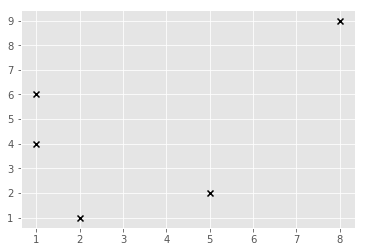

In [220]:
df = pd.DataFrame({"xs":[1,5,2,8,1], "ys":[4,2,1,9,6]})
plt.scatter(df['xs'],df['ys'],c='black',marker='x')

**57.** Columns in your DataFrame can also be used to modify colors and sizes.  Bill has been keeping track of his performance at work over time, as well as how good he was feeling that day, and whether he had a cup of coffee in the morning.  Make a plot which incorporates all four features of this DataFrame.

(Hint:  If you're having trouble seeing the plot, try multiplying the Series which you choose to represent size by 10 or more)

*The chart doesn't have to be pretty: this isn't a course in data viz!*

```
df = pd.DataFrame({"productivity":[5,2,3,1,4,5,6,7,8,3,4,8,9],
                   "hours_in"    :[1,9,6,5,3,9,2,9,1,7,4,2,2],
                   "happiness"   :[2,1,3,2,3,1,2,3,1,2,2,1,3],
                   "caffienated" :[0,0,1,1,0,0,0,0,1,1,0,1,0]})
```

In [223]:
df = pd.DataFrame({"productivity":[5,2,3,1,4,5,6,7,8,3,4,8,9],
                   "hours_in"    :[1,9,6,5,3,9,2,9,1,7,4,2,2],
                   "happiness"   :[2,1,3,2,3,1,2,3,1,2,2,1,3],
                   "caffienated" :[0,0,1,1,0,0,0,0,1,1,0,1,0]})
df

productivity  hours_in  happiness  caffienated
0              5         1          2            0
1              2         9          1            0
2              3         6          3            1
3              1         5          2            1
4              4         3          3            0
5              5         9          1            0
6              6         2          2            0
7              7         9          3            0
8              8         1          1            1
9              3         7          2            1
10             4         4          2            0
11             8         2          1            1
12             9         2          3            0

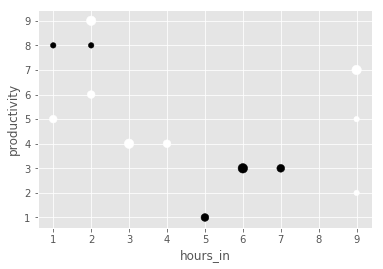

In [227]:
df.plot.scatter("hours_in", "productivity", s = df.happiness * 30, c = df.caffienated)

**58.**  What if we want to plot multiple things?  Pandas allows you to pass in a matplotlib *Axis* object for plots, and plots will also return an Axis object.

Make a bar plot of monthly revenue with a line plot of monthly advertising spending (numbers in millions)

```
df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                   "month":range(12)
                  })
```

In [228]:
df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                   "month":range(12)
                  })
df

revenue  advertising  month
0        57          2.1      0
1        68          1.9      1
2        63          2.7      2
3        71          3.0      3
4        72          3.6      4
5        90          3.2      5
6        80          2.7      6
7        62          2.4      7
8        59          1.8      8
9        51          1.6      9
10       47          1.3     10
11       52          1.9     11

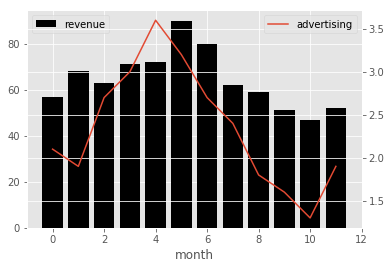

In [258]:
fig,ax=plt.subplots()
ax2 = ax.twinx()
ax.bar(df.month,df.revenue,color='black',label='revenue')
ax2.plot(df.month,df.advertising,label='advertising')

ax.set_xlim(-1,12)
ax.set_xlabel('month')
ax.legend(loc=2)
ax2.legend(loc=0)

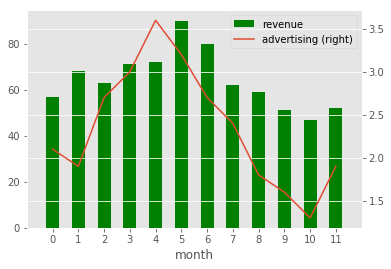

In [259]:
ax = df.plot.bar("month", "revenue", color = "green")
ax.set_xlim((-1,12))
df.plot.line("month", "advertising", secondary_y = True, ax = ax)


Now we're finally ready to create a candlestick chart, which is a very common tool used to analyze stock price data.  A candlestick chart shows the opening, closing, highest, and lowest price for a stock during a time window.  The color of the "candle" (the thick part of the bar) is green if the stock closed above its opening price, or red if below.

![Candlestick Example](img/candle.jpg)

This was initially designed to be a pandas plotting challenge, but it just so happens that this type of plot is just not feasible using pandas' methods.  If you are unfamiliar with matplotlib, we have provided a function that will plot the chart for you so long as you can use pandas to get the data into the correct format.

Your first step should be to get the data in the correct format using pandas' time-series grouping function.  We would like each candle to represent an hour's worth of data.  You can write your own aggregation function which returns the open/high/low/close, but pandas has a built-in which also does this.

The below cell contains helper functions.  Call ```day_stock_data()``` to generate a DataFrame containing the prices a hypothetical stock sold for, and the time the sale occurred.  Call ```plot_candlestick(df)``` on your properly aggregated and formatted stock data to print the candlestick chart.

In [260]:
import numpy as np
def float_to_time(x):
    return str(int(x)) + ":" + str(int(x%1 * 60)).zfill(2) + ":" + str(int(x*60 % 1 * 60)).zfill(2)

def day_stock_data():
    #NYSE is open from 9:30 to 4:00
    time = 9.5
    price = 100
    results = [(float_to_time(time), price)]
    while time < 16:
        elapsed = np.random.exponential(.001)
        time += elapsed
        if time > 16:
            break
        price_diff = np.random.uniform(.999, 1.001)
        price *= price_diff
        results.append((float_to_time(time), price))
    
    
    df = pd.DataFrame(results, columns = ['time','price'])
    df.time = pd.to_datetime(df.time)
    return df

#Don't read me unless you get stuck!
def plot_candlestick(agg):
    """
    agg is a DataFrame which has a DatetimeIndex and five columns: ["open","high","low","close","color"]
    """
    fig, ax = plt.subplots()
    for time in agg.index:
        ax.plot([time.hour] * 2, agg.loc[time, ["high","low"]].values, color = "black")
        ax.plot([time.hour] * 2, agg.loc[time, ["open","close"]].values, color = agg.loc[time, "color"], linewidth = 10)

    ax.set_xlim((8,16))
    ax.set_ylabel("Price")
    ax.set_xlabel("Hour")
    ax.set_title("OHLC of Stock Value During Trading Day")
    plt.show()

**59.** Generate a day's worth of random stock data, and aggregate / reformat it so that it has hourly summaries of the opening, highest, lowest, and closing prices

In [261]:
df = day_stock_data()
df

time       price
0    2018-07-12 09:30:00  100.000000
1    2018-07-12 09:30:01   99.999263
2    2018-07-12 09:30:01   99.920280
3    2018-07-12 09:30:06   99.972654
4    2018-07-12 09:30:18   99.926328
5    2018-07-12 09:30:18   99.914960
6    2018-07-12 09:30:26  100.001154
7    2018-07-12 09:30:27  100.010952
8    2018-07-12 09:30:30  100.074676
9    2018-07-12 09:30:30   99.981409
10   2018-07-12 09:30:33   99.984477
11   2018-07-12 09:30:34  100.006336
12   2018-07-12 09:30:37  100.074330
13   2018-07-12 09:30:38  100.055124
14   2018-07-12 09:30:41  100.154710
15   2018-07-12 09:30:41  100.203942
16   2018-07-12 09:30:42  100.231451
17   2018-07-12 09:30:46  100.164616
18   2018-07-12 09:30:48  100.197096
19   2018-07-12 09:30:51  100.243104
20   2018-07-12 09:31:00  100.189533
21   2018-07-12 09:31:00  100.155839
22   2018-07-12 09:31:04  100.137245
23   2018-07-12 09:31:16  100.143545
24   2018-07-12 09:31:19  100.146503
25   2018-07-12 09:31:23  100.227547
26   2018-07-12 09:31:24  100.189645
27   2018-07-12 09:31:26  100.170830
28   2018-07-12 09:31:29  100.154365
29   2018-07-12 09:31:31  100.079016
...                  ...         ...
6371 2018-07-12 15:58:17   95.563623
6372 2018-07-12 15:58:21   95.556092
6373 2018-07-12 15:58:26   95.546436
6374 2018-07-12 15:58:33   95.595680
6375 2018-07-12 15:58:34   95.680715
6376 2018-07-12 15:58:38   95.721513
6377 2018-07-12 15:58:39   95.771044
6378 2018-07-12 15:58:49   95.824118
6379 2018-07-12 15:58:58   95.886292
6380 2018-07-12 15:59:03   95.847818
6381 2018-07-12 15:59:03   95.884067
6382 2018-07-12 15:59:08   95.971103
6383 2018-07-12 15:59:09   95.888308
6384 2018-07-12 15:59:13   95.951346
6385 2018-07-12 15:59:18   96.035610
6386 2018-07-12 15:59:20   96.054494
6387 2018-07-12 15:59:26   96.079254
6388 2018-07-12 15:59:26   96.157800
6389 2018-07-12 15:59:26   96.234240
6390 2018-07-12 15:59:29   96.144782
6391 2018-07-12 15:59:33   96.121782
6392 2018-07-12 15:59:35   96.160754
6393 2018-07-12 15:59:43   96.191082
6394 2018-07-12 15:59:46   96.127588
6395 2018-07-12 15:59:47   96.183290
6396 2018-07-12 15:59:52   96.159212
6397 2018-07-12 15:59:53   96.095921
6398 2018-07-12 15:59:54   96.132639
6399 2018-07-12 15:59:58   96.134005
6400 2018-07-12 15:59:59   96.098079

[6401 rows x 2 columns]

**60.** Now that you have your properly-formatted data, try to plot it yourself as a candlestick chart.  Use the ```plot_candlestick(df)``` function above, or matplotlib's [```plot``` documentation](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.plot.html) if you get stuck.

*More exercises to follow soon...*